<a href="https://colab.research.google.com/github/luina-1004/MUSINSA/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%9C%A0%EC%82%AC%EB%8F%84%EC%B8%A1%EC%A0%95(VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image




# Feature 추출 함수 정의

In [73]:
class FeatureExtractor:
  def __init__(self):
    # Use VGG-16 as the architecture and ImageNet for the weight
    base_model = VGG16(weights='imagenet')
    # Customize the model to return features from fully-connected layer
    self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

  def extract(self, img):
  # Resize the image
    img = img.resize((224, 224))
    # Convert the image color space
    img = img.convert('RGB')
    # Reformat the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    # Extract Features
    feature = self.model.predict(x)[0]
    return feature / np.linalg.norm(feature)

# Feature 추출

In [ ]:
features = []
img_paths = []

fe = FeatureExtractor()
# Save Image Feature Vector with Database Images
for i in range(0, 2000):

  if i%100 == 0:
    print(i)
  
  try:
    path = '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail' 
    # path = '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass'   # 특징을 추출할 파일 경로

    os.chdir(path)
    files = os.listdir(path)
    image_path = '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass/{}'.format(files[i]) # 파일 속 이미지 파일 이름
    img_paths.append(image_path)

    # Extract Features
    feature = fe.extract(img=Image.open(image_path))

    features.append(feature)
    # Save the Numpy array (.npy) on designated path
    feature_path = "/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/features/" + files[i].strip('.jpg') + ".npy"     # Feature를 저장할 폴더 경로
    np.save(feature_path, feature)
  except Exception as e:
    print('예외가 발생했습니다.', e)

In [ ]:
len(features)

55

# 알고 싶은 이미지 설정 및 비교

1/1 [==============================] - 1s 661ms/step


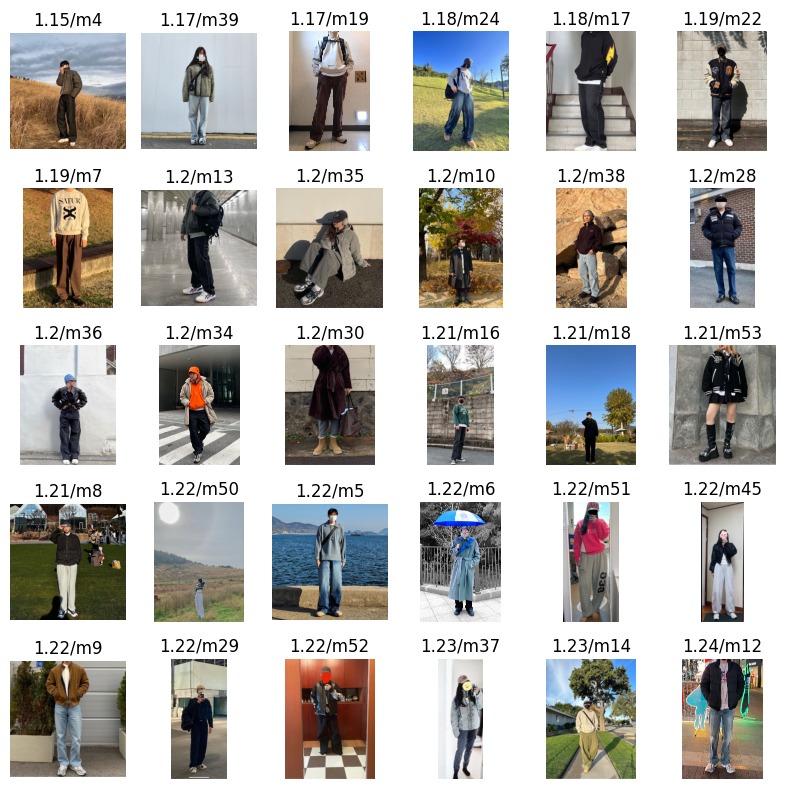

In [ ]:
# Insert the image query
img = Image.open("/content/2758352_1_500.jpeg") # 알고 싶은 이미지 경로
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images # 유사도 비교
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance # 가장 가까운 30개의 사진 추천
ids = np.argsort(dists)[:30]

scores = [(dists[id], img_paths[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

In [ ]:
id = np.argsort(dists)
iscores = [(dists[i], img_paths[i], i) for i in id]


In [ ]:
iscores

[(1.1489432,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass/2870818_37416297_0.jpg',
  3),
 (1.1719174,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass/2757396_35300115_0.jpg',
  38),
 (1.1747797,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass/2843802_34667945_0.jpg',
  18),
 (1.1772726,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass/2786221_33651118_0.jpg',
  23),
 (1.1836991,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass/2900517_35606856_0.jpg',
  16),
 (1.1859818,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass/2789926_32950238_0.jpg',
  21),
 (1.1887257,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass/2928418_36357327_0.jpg',
  6),
 (1.1954982,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass/2900517_37229730_0.jpg',
  12),
 (1.1962214,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass

In [ ]:
items = ['2758352','2758349','2758354','2758348','2758347','2758346','3081567']

In [ ]:
test = []
for s in iscores:
  for item in items:
    if item in s[1]:
      test.append(s)
      print(s)

(1.2450118, '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/pass/2758352_33848110_0.jpg', 22)


In [ ]:
len(test)

286

In [ ]:
9/len(test)

0.03146853146853147

In [ ]:
scores

[(0.8273115,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758359_32896327_0.jpg',
  422),
 (0.9387969,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2895508_34630177_0.jpg',
  230),
 (0.94195384,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_33573328_0.jpg',
  352),
 (0.9523028,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2885540_35293901_0.jpg',
  1106),
 (0.9630525,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_34571536_0.jpg',
  237),
 (0.98793274,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2905882_35189100_0.jpg',
  915),
 (0.9937148,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2905816_37486640_0.jpg',
  461),
 (0.99811053,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758349_35966198_0.jpg',
  1862),
 (0.999298,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/D

In [ ]:
same = []
for s in scores:
  for item in items:
    if item in s[1]:
      same.append(s)
      print(s)

(0.94195384, '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_33573328_0.jpg', 352)
(0.9630525, '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_34571536_0.jpg', 237)
(0.99811053, '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758349_35966198_0.jpg', 1862)
(1.0004568, '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_35849861_0.jpg', 1906)
(1.0073515, '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758349_36055467_0.jpg', 1828)
(1.015989, '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_32941328_0.jpg', 419)
(1.0380638, '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758349_36758333_0.jpg', 1611)
(1.0393554, '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_36171725_0.jpg', 1783)
(1.0671145, '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758349_37031374_0.jpg', 1547)


In [ ]:
same

[(0.94195384,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_33573328_0.jpg',
  352),
 (0.9630525,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_34571536_0.jpg',
  237),
 (0.99811053,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758349_35966198_0.jpg',
  1862),
 (1.0004568,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_35849861_0.jpg',
  1906),
 (1.0073515,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758349_36055467_0.jpg',
  1828),
 (1.015989,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_32941328_0.jpg',
  419),
 (1.0380638,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758349_36758333_0.jpg',
  1611),
 (1.0393554,
  '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail/2758354_36171725_0.jpg',
  1783),
 (1.0671145,
  '/content/drive/MyDrive/T아카데미-데이터분석과정

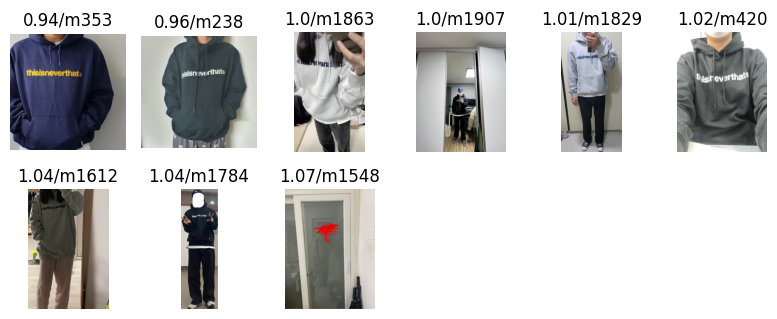

In [ ]:
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(3*3):
    score = same[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()